**Q1. Problem Statement: Gradient Boosting and XGBoost**<br>
Write a Python program that reads the bank_data.csv (provided on LMS) file into a DataFrame, the following are the tasks that are to be done while constructing Gradient Boosting and XGBoost model, and compare their accuracy.
1.	Load the given dataset into a DataFrame
2.	Find missing values and treat them
3.	Observe distribution of target variable (‘y’ is our target variable)
4.	Check data types for all features
5.	Do label encoding for all categorical features
6.	Extract independent and dependent variables into the x & y DataFrame
7.	Split your data into train and test, by 30% as test size
8.	Build a Gradient boosting classifier model and XGBoost model and compare their accuracy



**Dataset overview**

**job Type of job** (categorical: 'admin.','blue-collar', 'entrepreneur',
'housemaid', 'management', 'retired','self-employed', 'services',
'student', 'technician', 'unemployed', 'unknown')<br>
**marital** Marital status (categorical:
'divorced','married','single','unknown'; note: 'divorced' means
divorced or widowed)<br>
**education** (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school',
'illiterate', 'professional.course', 'university.degree','unknown')<br>
**default** has credit in default? (categorical: 'no','yes','unknown')<br>
**housing** has a housing loan? (categorical: 'no','yes','unknown')<br>
**loan** has a personal loan? (categorical: 'no','yes','unknown')<br>
**contact** contact communication type (categorical: 'cellular','telephone')<br>
**month** last contact month of year (categorical: 'jan', 'feb', 'mar', ...,
'nov', 'dec')<br>
**day_of_week** last contact day of the week (categorical:
'mon','tue','wed','thu','fri')<br>
**duration** last contact duration, in seconds
**campaign** number of contacts performed during this campaign and for
this client (numeric, includes last contact)<br>
**pdays** number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means
client was not previously contacted)<br>
**previous** number of contacts performed before this campaign and for
this client<br>
**poutcome** outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')<br>
**emp.var.rate** employment variation rate - quarterly indicator (numeric)<br>
**cons.price.idx** consumer price index - monthly indicator<br>
**cons.conf.idx** consumer confidence index - monthly indicator<br>
**euribor3m** euribor 3 month rate - daily indicator<br>
**nr.employed** number of employees - quarterly indicator<br>
**y** has the client subscribed a term deposit? (binary: 'yes','no')


**Step-1:** Import required libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

**Step-2:**  Load Given dataset into dataframe.

In [ ]:
    data=pd.read_csv('/content/sample_data/bank_data.csv')
    data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Step-3:**  Visulize the shape of dataset.

In [ ]:
data.shape

(17483, 21)

**Step-4:**  General discription of catagirical features.

In [ ]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,17483,17483,17483,17483,17483,17483,17483,17483,17483,17482,17482
unique,12,4,8,2,3,3,2,3,5,1,2
top,blue-collar,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
freq,5177,11069,4261,12258,8776,14432,12915,7763,3619,17482,16708


**Step-5:**  General discription of numeric features.

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,17483.000000,17483.000000,17483.000000,17483.0,17483.0,17482.000000,17482.000000,17482.000000,17482.000000,17482.000000
mean,39.664703,264.816164,2.801293,999.0,0.0,1.266783,94.088608,-39.677262,4.907744,5211.625495
std,9.297423,262.432216,3.155702,0.0,0.0,0.149062,0.219824,2.948021,0.051081,18.434052
min,19.000000,0.000000,1.000000,999.0,0.0,1.100000,93.918000,-42.700000,4.855000,5191.000000
25%,32.000000,107.000000,1.000000,999.0,0.0,1.100000,93.918000,-42.700000,4.857000,5191.000000
50%,39.000000,185.000000,2.000000,999.0,0.0,1.400000,93.994000,-41.800000,4.865500,5228.100000
75%,47.000000,326.000000,3.000000,999.0,0.0,1.400000,94.465000,-36.400000,4.961000,5228.100000
max,61.000000,3643.000000,56.000000,999.0,0.0,1.400000,94.465000,-36.400000,4.967000,5228.100000


**Step-6:**  Missing value analysis.

In [ ]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]}) # no missing value found

,Count,Percentage
age,0,0.000000
job,0,0.000000
marital,0,0.000000
education,0,0.000000
default,0,0.000000
housing,0,0.000000
loan,0,0.000000
contact,0,0.000000
month,0,0.000000
day_of_week,0,0.000000


**Step-7:**  Distribution Of Target Variable

In [ ]:
target_ratio = pd.DataFrame({'Counts':data.y.value_counts(),'Percentage':data.y.value_counts()/len(data)})
target_ratio

,Counts,Percentage
no,16708,0.955671
yes,774,0.044272


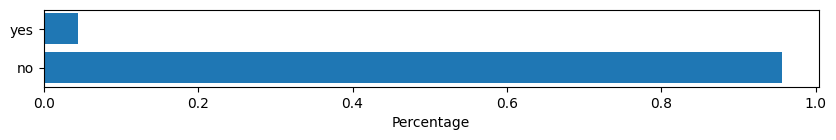

In [ ]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

**Step-8:**  Do label encoding for every catagorical feature.

In [ ]:
lb=LabelEncoder()
data.y=lb.fit_transform(data.y)

In [ ]:
lb=LabelEncoder()
data.job=lb.fit_transform(data.job)
data.marital = lb.fit_transform(data.marital)
data.education = lb.fit_transform(data.education)
data.default = lb.fit_transform(data.default)
data.housing = lb.fit_transform(data.housing)
data.loan = lb.fit_transform(data.loan)
data.contact = lb.fit_transform(data.contact)
data.poutcome = lb.fit_transform(data.poutcome)
data.day_of_week = lb.fit_transform(data.day_of_week)
data.month = lb.fit_transform(data.month)


**Step-9:**  Seprate dependent and independent feature into X and y.

In [ ]:
X=data.drop(['y'],axis=1)
y=data.y

**Step-10:** Split data into train and test.


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [ ]:
# Replace missing values with the mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Drop rows with missing values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

**Step-11:**  Build a Gradient boosting classifier model.


In [ ]:
gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
print("GradientBoostingClassifier score:",round(accuracy_score(y_test,gb_pred),3))

GradientBoostingClassifier score: 0.93
